# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
import pygame

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
During the simulation, the Smartcab doesn't move at all, no matter what the traffic light is. 
When the Agent properly idled at a red light, it received a positive reward(around 1 to 3.). But when the Agent idled at a green light with no oncoming traffic, it received a negative reward (punished by around 4 to 5.),  It received a positive reward when the Agent idled at a green light with oncoming traffic. It makes sense. Since the Agent should stop when the traffic light is right or when it is green but with oncoming traffic; the Agent should move when the traffic light is green and no oncoming traffic, otherwise it can not arrive at the destination.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

** agent.py **

1) **The first flag** I choose is  the environment.
-verbose: set to True to display additional output from the simulation
-num_dummies: discrete number of dummy agents in the environment, default is 100
-grid_size: discrete number of intersections (columns, rows), default is (8, 6)

I tried env = Environment(verbose=True, num_dummies=20, grid_size=(5,5)). Then the streets become 5 times 5, the number of agents except the smartcab becomes 20. And during the simulation process, the location, heading, action, reward, traffic around, violated or not are print out. For example,

Environment.step(): t = 48
Environment.act() [POST]: location: (3, 4), heading: (1, 0), action: None, reward: 1.71195888285
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'}, 'violation': 0, 'light': 'red', 'state': None, 'deadline': -28, 't': 48, 'action': None, 'reward': 1.7119588828537637, 'waypoint': 'right'}

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.53)
Agent not enforced to meet deadline.

2) **The second flag** I choose is the "Follow the driving agent": env.create_agent().
 When enforce_deadline is set to be True: env.set_primary_agent(agent, enforce_deadline=True), it  shows the remaining time to reach destination. It is forced to meet the deadline. Once it fails to pass the deadline, the trial is over and the next trial starts.
 
3) **The third flag** I choose is the  "Run the simulator" sim.run().
    -tolerance:  epsilon tolerance before beginning testing, default is 0.05 
    -n_test: discrete number of testing trials to perform, default is 0
   n_test is the number of tests after the training. "tolerance": when epsilon is less than tolerance, training is over and testing starts.
    
 


In the environment.py Python file, the class function **act** is  called when an agent performs an action. It considers an action and performs the action if it is legal, and  receive a reward for the agent based on traffic laws.


In the simulator.py Python file, ** render_text** is the non-GUI render display of the simulation.Simulated trial data will be rendered in the terminal/command prompt. While **render** is the GUI render display of the simulation. Supplementary trial data can be found from render_text.    

In the planner.py Python file,  the 'next_waypoint() function consider the **East-West** direction first.

-----
## Implement a Basic Driving Agent

The **first** step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


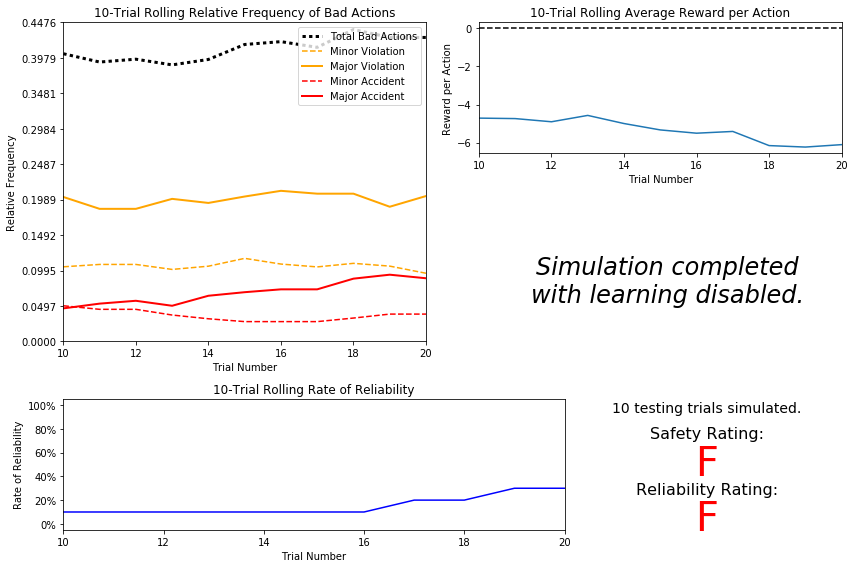

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**


- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

In the last 10 trials, around 39%-42% of the time, the driving agent makes bad decisions. And 
around 4.9%-10% of the time, the driving agent makes major accidents and the minor accidents rate is around 4.8%.

- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*

The rate of reliability is F. It makes sense, since when the driving agent takes actions, it doesn't consider where the destination is, neighter the traffic lights and the surrounding enviroment. We can't expect it to arrive at the destination on time and show high reliability.

- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

**UPDATA:** The rewards are negative in the last 10 trials. The absolute values are between 4 and 6. The negative rewards mean the agent has been penalized and the absolute values show that the penalty is  heavy. 

- *As the number of trials increases, does the outcome of results change significantly?*

As the number of trials increases, there is no significant change of the bad decisions. Only major accident rate increases a little bit. The average reward per trial decreases from ~-5.5 to ~-6.  The rate of reliability increases from 10% to 30%.

- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

It can not be considered safe, neigther reliable. Since the safe and reliability rates are both F in the tests, which means  the agent causes at least one major accident,
such as driving through a red light with cross-traffic and the agent fails to reach the destination on time for at least 60% of trips. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** 


'waypoint' is the direction the Smartcab should drive leading to the destination. It is related to the efficiency. If the Smartcab drives in the opposite direction, it will take a longer time to arrive at the destination and the time may be run out.


'light' is the color of the light, which is related to efficiency and  safety. If the Smartcab takes no action when the light is green and  there is no oncoming traffic, then it will delay and takes a longer time to reach the destination. But when the light is red or the light is green but with oncoming traffice, if the Smartcab moves, then it will cause accident or violation to the traffic law. It affects its safety.

'left', 'right' and 'oncoming' describe the agents around the Smartcab. To avoid accidents or violation to the traffic law, the action of the Smartcab also depends on the surrounding environment.But the cars coming from the right can always be ignored. The reason for this is whenever those cars would have the right-of-way, the light is red for the smartcab anyway. Also, the traffic inputs represent the indicated direction of the each car (instead of their actual movement), so if the car on the right somehow decided to break a traffic rule, inputs['right'] couldn't help the agent avoid the accident.

'deadline' is the number of actions remaining for the Smartcab to reach the destination before running out of time. So it is close to the efficiency. 

However, since  'deadline' can take any integers from 0 to the total number of actions, when we make combinations, it will increase the number of stats significantly. Further, if a car follows the traffic law according the situations around and choose reasonable waypoints, it can arrive at the destination safely and efficiently. Knowing the deadline doesn't help too much. With the two reasons above, I won't include it into the features.

So the features I choose are 'waypoint' and 'input'. 

Another concern is that with limited training times, the agent may not learn from  many features, i.e. the agent can't find useful patterns in limited time if there are too features. 

So I would like to choose (waypoint, inputs['light'], inputs['left'], inputs['oncoming']).


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

'waypoint' can take 3 values: 'left', 'right' and 'oncoming'. 

'light' can be 'green' and 'red'.

'left' and  'oncoming' can take 4 values.

So if all of them are included, the total number of the states is 3\*2\*4\*4=96. That's a lot. It is a challenge to learn a policy for each possible state within a reasonable number of training trials, which is at least 96.






### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

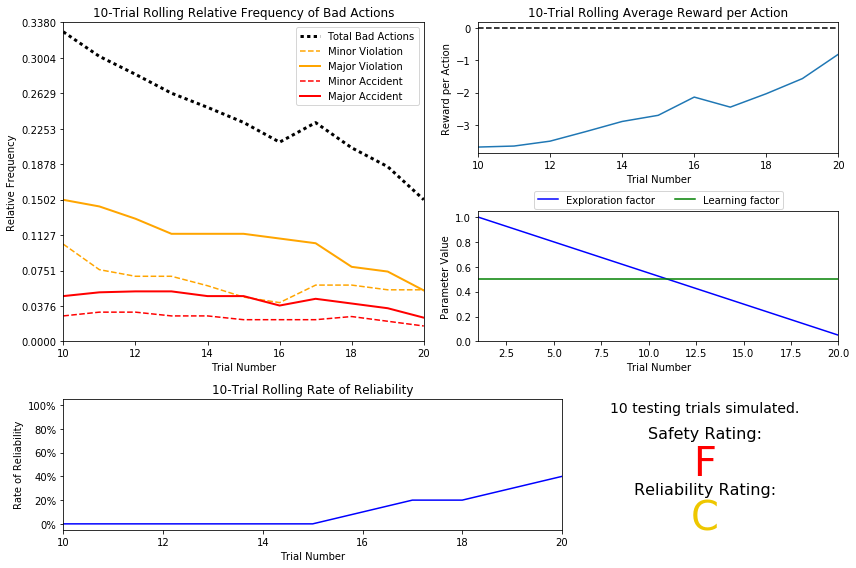

In [148]:
# Initial Q-Learning 
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**


- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

Both of the rates of reliability increase as the number of training increases. But the default Q-learning agent is more significant. Howevery, I doubt it is always true. For the basic driving agent, if we run again, the increase trend of the rates of reliability may disappear, because it doesn't learn from previous rewards.

- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

Here it is 20 times. Since epsilon=1-0.05t. When t=20, epsilon is less than the tolerance 0.05 and the test begins. So it makes sense.

- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

The panel shows a line with negative slope. It is consistant with the epsion we choose in each trial: epsilon=1-0.05 t. 

- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

Yes, it decreases. It has a obvious trend to decrease.  The reward increases from (~)-4 to (~)-1. 

- *How does the safety and reliability rating compare to the initial driving agent?*

The safety rating is F and the reliability rating is C. So the rate of reliability has an improvement compared with the initial driving agent. But the ratings fluctuate a lot across different runs. Since we only has 20 trials and the state space has 96 states, it is far from being well trained. The model will be more robust and can be  improved a lot by increasing the number of trials in the training process. 




-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

Tune alpha
===

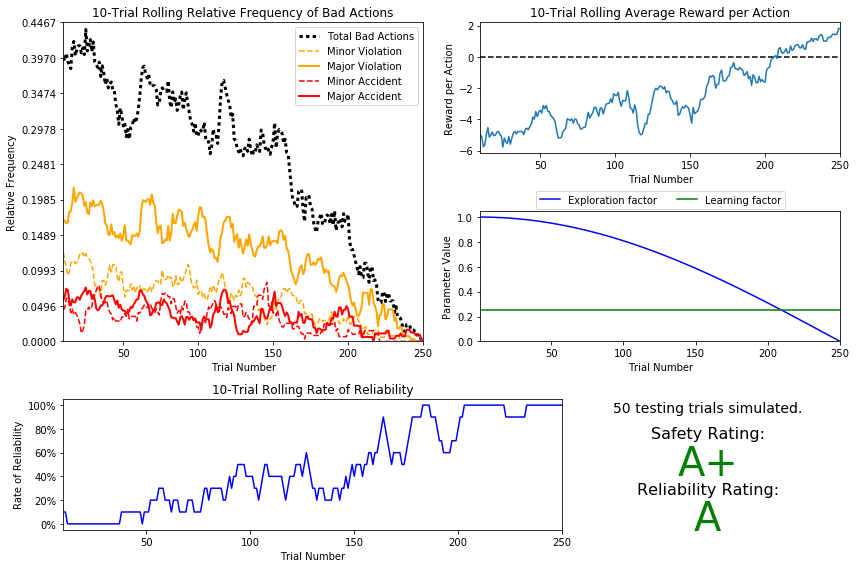

In [150]:
#alpha=0.25 and epsilon starts from 1.0 with the cos function
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

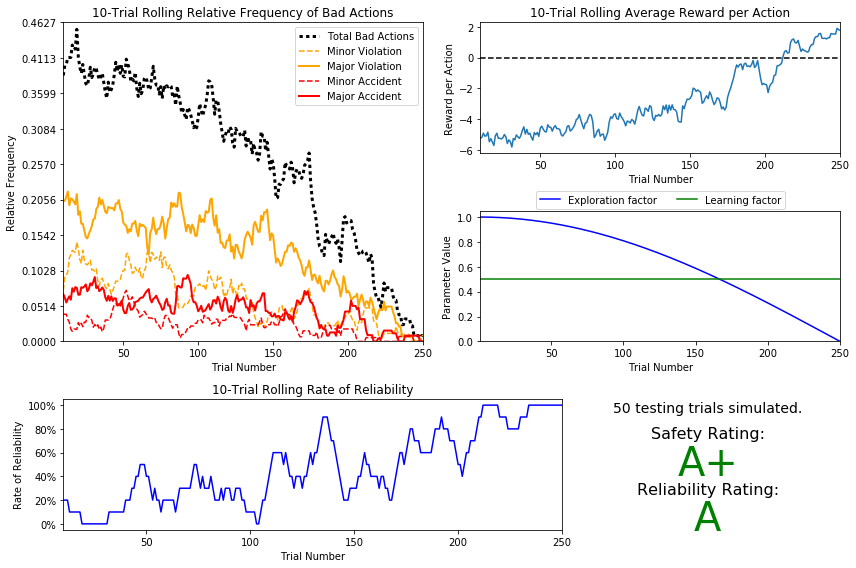

In [149]:
#alpha=0.5 and epsilon starts from 1.0 with the cos function
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

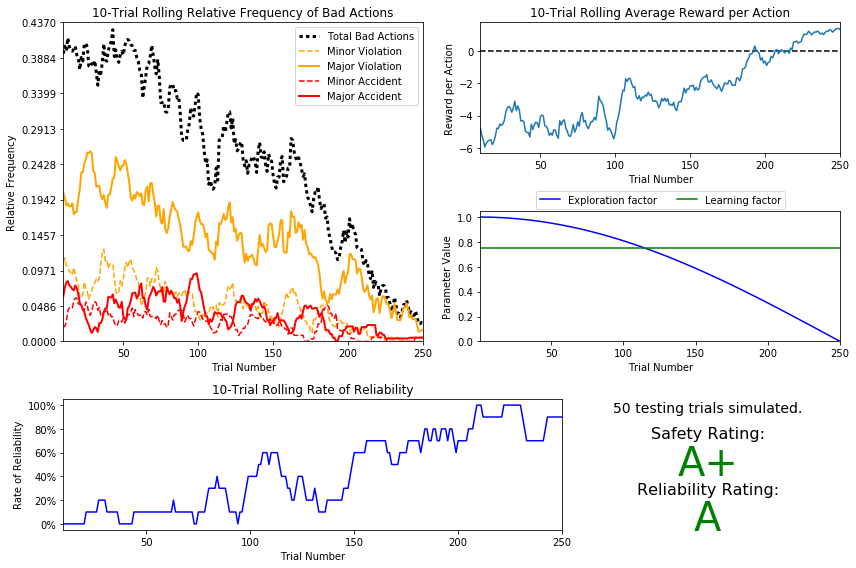

In [151]:
#alpha=0.75 and epsilon starts from 1.0 with the cos function
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

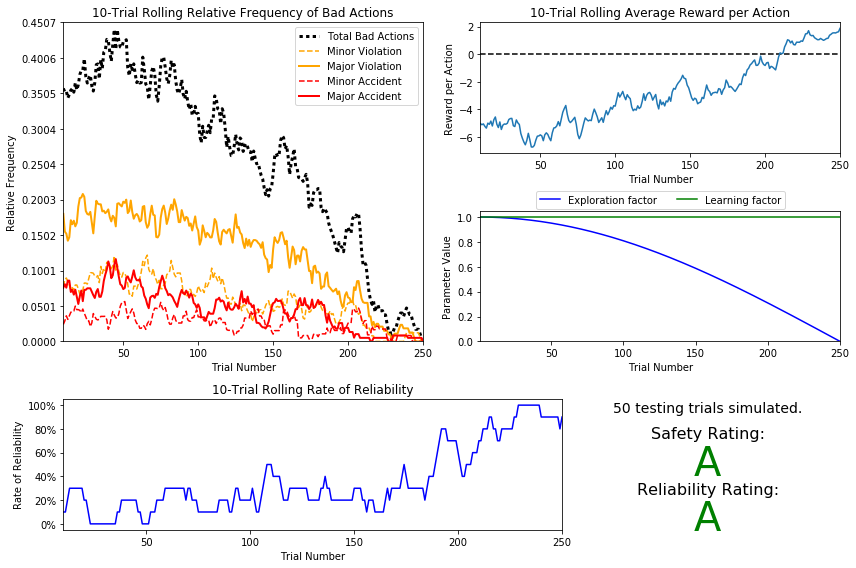

In [152]:
#alpha=1 and epsilon starts from 1.0 with the cos function
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

It seems that  alpha doesn't affect the rates that much.

Tune the number of trials
==

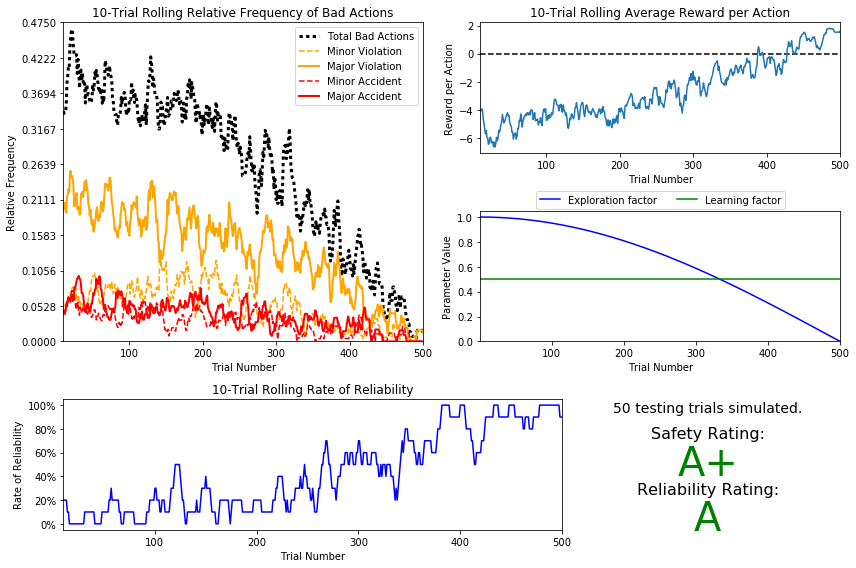

In [153]:
vs.plot_trials('sim_improved-learning.csv')

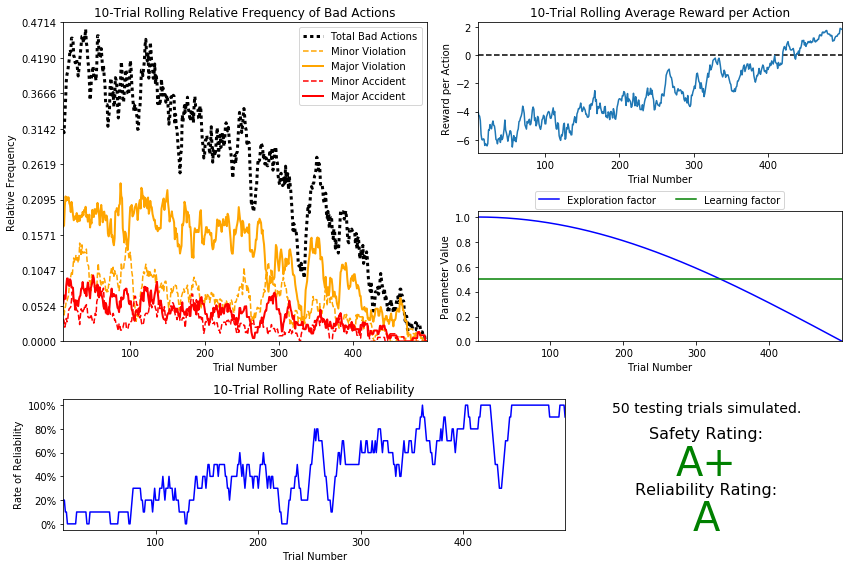

In [101]:

# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

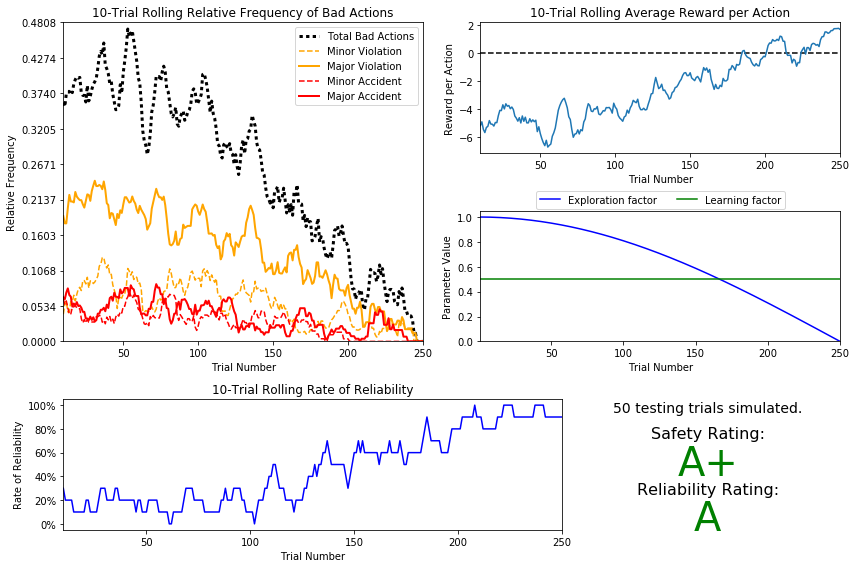

In [114]:
vs.plot_trials('sim_improved-learning.csv')

When number of trials is 100, the model is not robust.

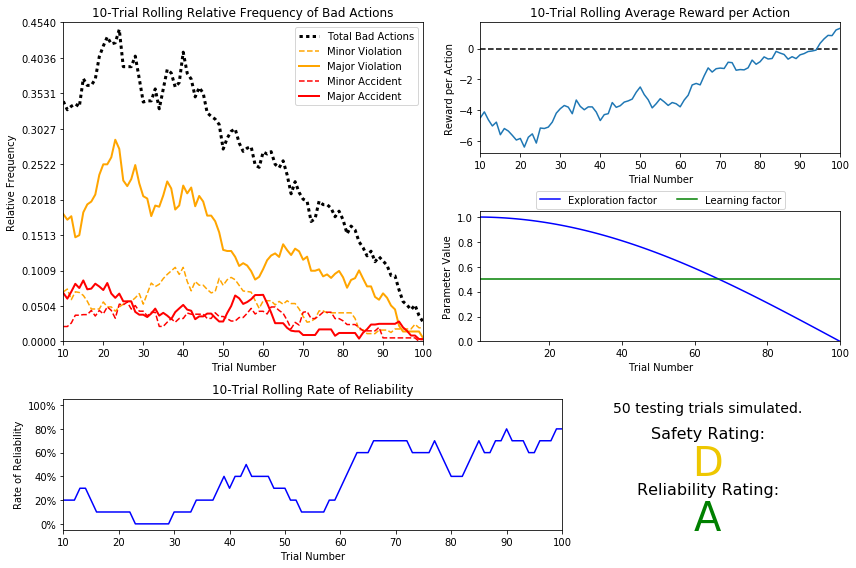

In [112]:
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *What decaying function was used for epsilon (the exploration factor)?*

The decaying function I choose is $$ cos(self.trial*np.pi/500) $$. Since it doesn't decay so fast as the exponential function, the training process has more chances to explore possible states. Since $$cos(pi/2)=0$$, by choosing $$a=pi/n$$, I almost can determine the number of training time to be n/2. 

- *Approximately how many training trials were needed for your agent before begining testing?*

When the number of training trials is 250, the model is robust. But when I reduced the number of trials to 150, it is no longer robust.

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

I choose epsilon to be 1.0. Because I would like to train the Q-table many times to ensure every state is encountered and trained, and the probability of taking random action at the beginning is 0 and then with probability epsilon_t at time t, and epsilon_t declays.  

I tried constant alpha, like 0.25,0.5,0.75,1.0. And they don't have much difference to the results.

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

I ran it with the parameters above several times and both the ratings of reliability and safety are  A+ and it is robust, which is big improvement compared with the default Q-Learner.

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

I think so. Since most of the time, the  rates are A+. And the Q-table has few zeros. 


- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

I am satisfied with the safety and reliability ratings. Since most of runs, it can give A+.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
The features of states I choose are (waypoint, inputs['light'],  inputs['left'], inputs['oncoming']).

Examples: (1) when the state is ('left', 'green','None','None'), then the best action is to turn left.

(2) when the state is ('forward', 'red','left','None'), the best action is no move. 

(3) when the state is ('right', 'green', 'forward','None'), the best action is right.




This is an example from the Q-table with optimal policy:

('left', 'green', 'forward', 'left')
 -- forward : 0.70
 -- None : 0.40
 -- right : 0.42
 -- left : 2.01

The destination is to the Smartcab's left. When the light is green, a vehicle to the Smartcab's left intends to move forward and a vehicle across the intersection from the Smartcab is to turn left, the Smartcab can turn left, but it should be careful to avoid crash with the oncoming vehicle. There is no need to worry the vehicle to its left, since the traffic light for it should be red. The highest Q-score corresponds to left, so it is the right policy.

An example which is not the optimal policy:

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.02
 -- left : -17.15

When the destination is to the Smartcab's left, the traffic light is red, the Smartcab should idle instead of turning right. Because by turning right it may take longer time for the Smartcab to arrive at the destination. Since the values for forward and None are zeros, it is likely that the values have not been updated yet. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

The first characteristic: the state of the Smartcab is ('waypoint', 'light', 'left', 'oncoming'). The state at this moment is not causally connected to the next. Also, in the state, there is no feature about the location of the Smartcab, so there is no way to get the distance from the Smartcab to the destination. Then we can not propagate rewards based on distance from the destination.

The second characteristic: the environment, for example, the destination, changes location over trials. However, we propagate rewards  from every state eventually. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.